# Chargement des données

In [63]:
import pandas as pd

df = pd.read_csv("DataSet_Emails.csv")
# Aperçu de la structure
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31716 entries, 0 to 31715
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  31716 non-null  int64 
 1   message_id  31716 non-null  int64 
 2   text        31665 non-null  object
 3   label       31716 non-null  int64 
 4   label_text  31716 non-null  object
 5   subject     31442 non-null  object
 6   message     31371 non-null  object
 7   date        31716 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.9+ MB


,Unnamed: 0,message_id,text,label,label_text,subject,message,date
0,0,33214,any software just for 15 $ - 99 $ understandin...,1,spam,any software just for 15 $ - 99 $,understanding oem software\nlead me not into t...,2005-06-18
1,1,11929,perspective on ferc regulatory action client c...,0,ham,perspective on ferc regulatory action client c...,"19 th , 2 : 00 pm edt\nperspective on ferc reg...",2001-06-19
2,2,19784,wanted to try ci 4 lis but thought it was way ...,1,spam,wanted to try ci 4 lis but thought it was way ...,viagra at $ 1 . 12 per dose\nready to boost yo...,2004-09-11
3,3,2209,"enron / hpl actuals for december 11 , 2000 tec...",0,ham,"enron / hpl actuals for december 11 , 2000",teco tap 30 . 000 / enron ; 120 . 000 / hpl ga...,2000-12-12
4,4,15880,looking for cheap high - quality software ? ro...,1,spam,looking for cheap high - quality software ? ro...,"water past also , burn , course . gave country...",2005-02-13
5,5,15726,"emerging growth stock profile vera ,\nvcsc - b...",1,spam,emerging growth stock profile,"vera ,\nvcsc - brand new stock for your attent...",2005-01-18
6,6,21384,internet provider abuse i noticed that you hav...,1,spam,internet provider abuse,i noticed that you have visited illegal websit...,2005-02-24
7,7,9556,[ avfs ] romanian software production & export...,1,spam,[ avfs ] romanian software production & export,to : avfs @ fazekas . hu\nattn : marketing dep...,2002-04-21
8,8,5458,fortune most admired ranking congratulations !...,0,ham,fortune most admired ranking,congratulations ! for an unprecedented five ye...,2000-02-07
9,9,11027,"localized software , all languages available ....",1,spam,"localized software , all languages available .","hello , we would like to offer localized softw...",2005-07-22


- Notre jeu de données contient 31 716 lignes (ou emails), indexées de 0 à 31 715
- Le DataFrame est composé de 8 colonnes au total.
- text (type object): C'est le corps de l'email, le texte principal que notre modèle analysera.
- label (type int64) et label_text (type object): Ces deux colonnes sont vos variables cibles (les étiquettes). 
- label est l'étiquette numérique (probablement 0 pour ham et 1 pour spam), tandis que label_text est la version textuelle (ham, spam, etc.).
- subject (type object): Le sujet de l'email. Il y a 274 valeurs manquantes. Le sujet est une information très pertinente pour la détection de spams, donc il serait judicieux de l'intégrer au texte principal de l'email après avoir géré les valeurs manquantes.
- date (type object): La date d'envoi de l'email. Cette colonne est complète. Sauf si vous prévoyez une analyse temporelle, cette variable n'est probablement pas nécessaire pour la détection de spam en elle-même.

# Analyse exploratoire des données (EDA) 

**1. Identifier les valeurs manquantes et les doublons**

In [64]:
df.isnull().sum()

Unnamed: 0      0
message_id      0
text           51
label           0
label_text      0
subject       274
message       345
date            0
dtype: int64

Affiche des valeurs manquantes pour les colonnes:
- text 51 valeurs manquantes (il est mieux de les supprimer puisque ce nombre est négligeable devant 31715)
- subject 274 valeurs manquantes
- message 345 valeurs manquantes 

In [65]:
# Suppression des lignes avec des valeurs manquantes dans les colonnes spécifiées
df.dropna(subset=['text', 'subject', 'message'], inplace=True)
print(df.isnull().sum())

Unnamed: 0    0
message_id    0
text          0
label         0
label_text    0
subject       0
message       0
date          0
dtype: int64


Pour vérifier si les valeurs manquantes ont bien été supprimées

**2. Analyser la distribution des variables**

In [66]:
df.duplicated().sum()

np.int64(0)

**3. Étudier les relations entre variables à l’aide de matrices de corrélation et de visualisations.**

Dans notre cas, les colonnes message_id, label et Unnamed sont numériques.

In [67]:
correlation_matrix = df[['message_id', 'label']].corr()
print("Matrice de Corrélation :\n", correlation_matrix)

Matrice de Corrélation :
             message_id     label
message_id    1.000000  0.520872
label         0.520872  1.000000


Calcul de la matrice de corrélation pour les variables numériques

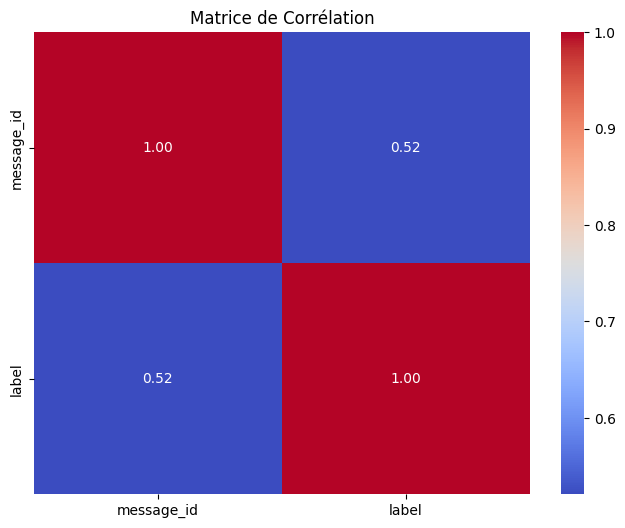

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()

- La visualisation la plus courante pour une matrice de corrélation est une carte de chaleur (heatmap) avec la bibliothèque seaborn.
- Pour les variables catégorielles comme label_text et la variable cible label, il est plus efficace d'utiliser des visualisations basées sur la fréquence ou la proportion.

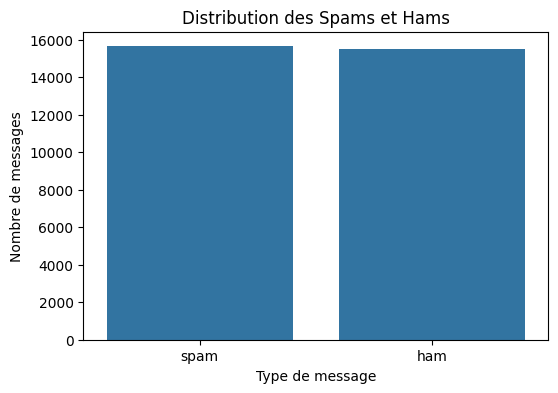

In [69]:
# Visualisation de la distribution de la variable cible 'label_text'
plt.figure(figsize=(6, 4))
sns.countplot(x='label_text', data=df)
plt.title('Distribution des Spams et Hams')
plt.xlabel('Type de message')
plt.ylabel('Nombre de messages')
plt.show()

Le graphique montre que notre jeu de données est parfaitement équilibré en termes de nombre d'emails de type "spam" et "ham". Il y a un nombre quasiment égal d'exemples dans chaque classe.

C'est une excellente nouvelle pour l'apprentissage automatique, car cela signifie que votre modèle ne sera pas biaisé en faveur de l'une des classes. Il n'est pas nécessaire d'appliquer des techniques de rééchantillonnage comme l'oversampling ou l'undersampling pour corriger un déséquilibre de classes, ce qui simplifie le processus d'entraînement.

**4. Créer un nuage pour les mots fréquents dans les spams et un autre pour les emails légitimes (ham).**

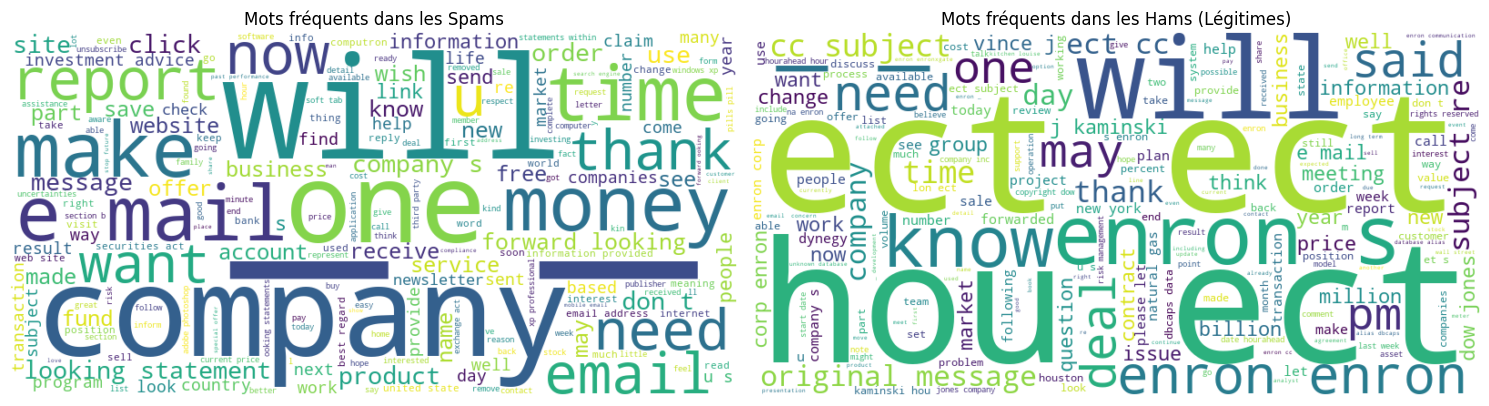

In [70]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Séparer les emails en deux catégories
spam_emails = df[df['label_text'] == 'spam']['text']
ham_emails = df[df['label_text'] == 'ham']['text']

# Concaténer tout le texte pour chaque catégorie
spam_text = ' '.join(spam_emails)
ham_text = ' '.join(ham_emails)

# Créer un nuage de mots pour les spams
wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# Créer un nuage de mots pour les hams
wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

# Afficher les deux nuages de mots
plt.figure(figsize=(15, 7))

# Nuage de mots pour les Spams
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Mots fréquents dans les Spams')
plt.axis('off')

# Nuage de mots pour les Hams
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Mots fréquents dans les Hams (Légitimes)')
plt.axis('off')

plt.tight_layout()
plt.show()

Créer des nuages de mots est une excellente façon de visualiser les termes les plus fréquents et d'obtenir une première intuition sur les différences linguistiques entre les spams et les emails légitimes.

# Prétraitement du texte

**1. Convertir tout le texte en minuscules : text.lower().**

In [71]:
df['text'] = df['text'].str.lower()
print(df['text'].head(10))

0    any software just for 15 $ - 99 $ understandin...
1    perspective on ferc regulatory action client c...
2    wanted to try ci 4 lis but thought it was way ...
3    enron / hpl actuals for december 11 , 2000 tec...
4    looking for cheap high - quality software ? ro...
5    emerging growth stock profile vera ,\nvcsc - b...
6    internet provider abuse i noticed that you hav...
7    [ avfs ] romanian software production & export...
8    fortune most admired ranking congratulations !...
9    localized software , all languages available ....
Name: text, dtype: object


**2. Supprimer les doublons dans les données.**

In [72]:
nombre_doublons = df.duplicated().sum()
print(f"Nombre de doublons trouvés : {nombre_doublons}")

Nombre de doublons trouvés : 0


📌 on n'a pas de valeurs doublant a supprimer

**3. Identifier les valeurs manquantes et supprimer les lignes où la colonne text est vide ou manquante**

📌 déjà fait avant

In [73]:
import pandas as pd
nombre_valeurs_manquantes = df['text'].isnull().sum()
print(f"Nombre de valeurs manquantes dans la colonne 'text' : {nombre_valeurs_manquantes}")

Nombre de valeurs manquantes dans la colonne 'text' : 0


# Appliquer la tokenisation : nltk.word_tokenize(text)

- Suppression de la ponctuation, caractères spéciaux et chiffres
- Tokenisation
- Stemming
- Vectorisation avec TF-IDF

**4. Supprimer les stopwords (mots vides) avec nltk.corpus.stopwords.words('english').**

In [74]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))  # Obtenir la liste des stopwords en anglais

def remove_stopwords(text):
    tokens = word_tokenize(text) # Tokenisation du texte
    filtered_tokens = [word for word in tokens if word not in stop_words] # Filtrer les stopwords
    return " ".join(filtered_tokens) # Reconstruire la phrase

# Appliquer la fonction de suppression des stopwords à la colonne 'text'
df['text'] = df['text'].apply(remove_stopwords)

# Afficher les premières lignes pour vérifier le résultat
print(df['text'].head())


0    software 15 $ - 99 $ understanding oem softwar...
1    perspective ferc regulatory action client conf...
2    wanted try ci 4 lis thought way expensive ? vi...
3    enron / hpl actuals december 11 , 2000 teco ta...
4    looking cheap high - quality software ? rotate...
Name: text, dtype: object


**5. Supprimer la ponctuation et les caractères spéciaux à l’aide de re.sub() ou string.punctuation.**

In [75]:
import re
import string

def remove_punctuation(text):
    # Combinaison de toutes les ponctuations de la bibliothèque string
    punctuation_to_remove = string.punctuation
    
    # Remplacer chaque caractère de ponctuation par une chaîne vide
    translator = str.maketrans('', '', punctuation_to_remove)
    return text.translate(translator)

# Appliquer la fonction de suppression de la ponctuation à la colonne 'text'
df['text'] = df['text'].apply(remove_punctuation)

# Afficher les premières lignes pour vérifier le résultat
print(df['text'].head())

0    software 15   99  understanding oem software l...
1    perspective ferc regulatory action client conf...
2    wanted try ci 4 lis thought way expensive  via...
3    enron  hpl actuals december 11  2000 teco tap ...
4    looking cheap high  quality software  rotated ...
Name: text, dtype: object


**6. Appliquer le stemming avec PorterStemmer() de NLTK pour réduire les mots à leur racine.**

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

def tokenize_text(text):    # Appliquer la tokenisation
    return word_tokenize(text)

df['tokens'] = df['text'].apply(tokenize_text)

# Affichez les premières lignes pour vérifier que la colonne 'tokens' a bien été créée
print(df[['text', 'tokens']].head())


                                                text  \
0  software 15   99  understanding oem software l...   
1  perspective ferc regulatory action client conf...   
2  wanted try ci 4 lis thought way expensive  via...   
3  enron  hpl actuals december 11  2000 teco tap ...   
4  looking cheap high  quality software  rotated ...   

                                              tokens  
0  [software, 15, 99, understanding, oem, softwar...  
1  [perspective, ferc, regulatory, action, client...  
2  [wanted, try, ci, 4, lis, thought, way, expens...  
3  [enron, hpl, actuals, december, 11, 2000, teco...  
4  [looking, cheap, high, quality, software, rota...  
0    [software, 15, 99, understanding, oem, softwar...
1    [perspective, ferc, regulatory, action, client...
2    [wanted, try, ci, 4, lis, thought, way, expens...
3    [enron, hpl, actuals, december, 11, 2000, teco...
4    [looking, cheap, high, quality, software, rota...
Name: tokens, dtype: object


# Extraction des caractéristiques

**1. Vectoriser le texte à l’aide de TfidfVectorizer() ou CountVectorizer()**

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib # Si vous utilisez joblib pour sauvegarder le vectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=10000)

X = tfidf_vectorizer.fit_transform(df['text'])

print(f"Forme de la matrice TF-IDF (Nombre d'emails, Nombre de caractéristiques) : {X.shape}")
print(f"Type de la matrice TF-IDF : {type(X)}")

import os
if not os.path.exists('models'):
    os.makedirs('models')

joblib.dump(tfidf_vectorizer, 'models/tfidf_vectorizer.pkl')
print("Vectorizer TF-IDF sauvegardé sous 'models/tfidf_vectorizer.pkl'")

print("\n--- Vectorisation TF-IDF terminée ---")

Forme de la matrice TF-IDF (Nombre d'emails, Nombre de caractéristiques) : (31148, 10000)
Type de la matrice TF-IDF : <class 'scipy.sparse._csr.csr_matrix'>
Vectorizer TF-IDF sauvegardé sous 'models/tfidf_vectorizer.pkl'

--- Vectorisation TF-IDF terminée ---


 --- Vectorisation du texte avec TfidfVectorizer ---

- Instancier le TfidfVectorizer
- On utilise max_features pour limiter le vocabulaire et rendre le modèle plus gérable

- Adapter (fit) le vectorizer aux données d'entraînement et transformer le texte
- 'final_text_for_vectorization' est la colonne qui contient le texte nettoyé, tokenisé et stemmé

- Sauvegarder le vectorizer entraîné
- Créez le dossier 'models' s'il n'existe pas

**2. Définir X à partir des variables sélectionnées.**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
import os # Importez os si vous utilisez os.makedirs

tfidf_vectorizer = joblib.load('models/tfidf_vectorizer.pkl') # Charge le vectorizer sauvegardé
X = tfidf_vectorizer.transform(df['text']) # Transforme le texte avec le vectorizer chargé
print("X (matrice TF-IDF) est définie.")

# --- Définition de y (Variable Cible) ---
y = df['label_text']

print(f"\nForme de X (Caractéristiques) : {X.shape}")
print(f"Forme de y (Cible) : {y.shape}")
print(f"Les 20 premières valeurs de y : \n{y.head(20)}")

X (matrice TF-IDF) est définie.

Forme de X (Caractéristiques) : (31148, 10000)
Forme de y (Cible) : (31148,)
Les 20 premières valeurs de y : 
0     spam
1      ham
2     spam
3      ham
4     spam
5     spam
6     spam
7     spam
8      ham
9     spam
10    spam
11    spam
12     ham
13     ham
14     ham
15     ham
16    spam
17    spam
18     ham
19     ham
Name: label_text, dtype: object


 --- Définition de X (Caractéristiques) ---
- X est la matrice TF-IDF résultant de la vectorisation de votre texte prétraité.
- Cette partie suppose que tfidf_vectorizer a déjà été instancié et fit_transformé
- sur vos données, et potentiellement sauvegardé et chargé si vous travaillez dans une nouvelle session.
- y est la colonne qui contient les étiquettes 'spam' ou 'ham'.
- Assurez-vous que cette colonne existe et est propre dans votre DataFrame df.

**3. Diviser les données en ensemble d’entraînement et de test à l’aide de train_test_split.**

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Afficher les formes des ensembles pour vérifier le split
print(f"Forme de X_train : {X_train.shape}")
print(f"Forme de X_test : {X_test.shape}")
print(f"Forme de y_train : {y_train.shape}")
print(f"Forme de y_test : {y_test.shape}")

# Vérifier la distribution des classes dans les ensembles (optionnel mais recommandé pour stratify)
print("\nDistribution des classes dans y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribution des classes dans y_test:")
print(y_test.value_counts(normalize=True))

Forme de X_train : (24918, 10000)
Forme de X_test : (6230, 10000)
Forme de y_train : (24918,)
Forme de y_test : (6230,)

Distribution des classes dans y_train:
label_text
spam    0.502288
ham     0.497712
Name: proportion, dtype: float64

Distribution des classes dans y_test:
label_text
spam    0.502247
ham     0.497753
Name: proportion, dtype: float64


# Entraînement de plusieurs modèles de classification

1. Tester les algorithmes 

2. Évaluation des modèles

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB # Souvent utilisé pour les données textuelles (TF-IDF, Count)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


print("--- Entraînement et test des algorithmes de classification ---")

# --- 1. Decision Tree Classifier ---
print("\n##### 1. Decision Tree Classifier #####")
# Instancier le modèle
dt_classifier = DecisionTreeClassifier(random_state=42)
# Entraîner le modèle
dt_classifier.fit(X_train, y_train)
# Faire des prédictions sur l'ensemble de test
y_pred_dt = dt_classifier.predict(X_test)
# Évaluer le modèle (Précision)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Précision du Decision Tree Classifier : {accuracy_dt:.4f}")



# --- 2. Naïve Bayes Classifier (MultinomialNB) ---
print("\n##### 2. Naïve Bayes Classifier (MultinomialNB) #####")
# Instancier le modèle
# MultinomialNB est bien adapté aux caractéristiques de comptage/fréquence comme TF-IDF
nb_classifier = MultinomialNB()
# Entraîner le modèle
nb_classifier.fit(X_train, y_train)
# Faire des prédictions sur l'ensemble de test
y_pred_nb = nb_classifier.predict(X_test)
# Évaluer le modèle (Précision)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Précision du Naïve Bayes Classifier : {accuracy_nb:.4f}")



# --- 3. Support Vector Classifier (SVC) ---
print("\n##### 3. Support Vector Classifier (SVC) #####")
# Instancier le modèle
# SVC peut prendre plus de temps à entraîner sur de grands jeux de données textuels
# Pour un premier test rapide, vous pouvez utiliser un noyau linéaire qui est souvent efficace pour le texte
svc_classifier = SVC(kernel='linear', random_state=42)
# Entraîner le modèle
svc_classifier.fit(X_train, y_train)
# Faire des prédictions sur l'ensemble de test
y_pred_svc = svc_classifier.predict(X_test)
# Évaluer le modèle (Précision)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"Précision du Support Vector Classifier : {accuracy_svc:.4f}")

print("\n--- Test des algorithmes terminé ---")

# Stocker les précisions pour une comparaison facile (optionnel)
accuracies = {
    "Decision Tree": accuracy_dt,
    "Naïve Bayes (Multinomial)": accuracy_nb,
    "SVC (Linear)": accuracy_svc
}

print("\nRécapitulatif des précisions :")
for model_name, accuracy in accuracies.items():
    print(f"- {model_name}: {accuracy:.4f}")

--- Entraînement et test des algorithmes de classification ---

##### 1. Decision Tree Classifier #####
Précision du Decision Tree Classifier : 0.9626

##### 2. Naïve Bayes Classifier (MultinomialNB) #####
Précision du Naïve Bayes Classifier : 0.9873

##### 3. Support Vector Classifier (SVC) #####
Précision du Support Vector Classifier : 0.9917

--- Test des algorithmes terminé ---

Récapitulatif des précisions :
- Decision Tree: 0.9626
- Naïve Bayes (Multinomial): 0.9873
- SVC (Linear): 0.9917


# Sélection et sauvegarde du meilleur modèle

1. Validation croisée

2. Optimisation des hyperparamètres

3. Sélection et sauvegarde du meilleur modèle